# **Conversão de Sinais de Tempo Contínuo em Tempo Discreto - Teorema da amostragem**

## **Conceitos iniciais:**

**Processamento.**

- Manipulação de uma quantidade de informação.

**Digital.**

- A implementação da sequência de operações sobre a informação digital é imediata.

**Sinais.**

- É uma função de uma variável(geralmente temporal), que descreve o comportamento de uma grandeza física presente em um fenômeno natural observável.

## **Modelo PDS e Conceitos Iniciais**

Utizaremos o diagrama abaixo para explorarmos o conceito de amostragem. Note que $x_c(t)$ é um sinal contínuo. Geralmente, na natureza tangível e observável, os sinais não são discretizados, havendo uma continuidade e suavidade. Um exemplo disso são os sinais de movimento de um objeto, como o movimento de um carro. Quando fazemos um vídeo de um carro, o movimento do carro é discretizado, ou seja, não há continuidade. Iremos transformar o sinal contínuo em sinal discreto.

![](../Imagens/Unidade2/modelo-pds.png)

**Amostrador**

- O amostrador é um mecanismo que transforma um sinal contínuo em um sinal discreto.
- $x_s(t)$ é uma versão em trem de impulsos de $x_c(t)$.
- $x_s(t)$ é um sinal discreto.
- $x_s(t = nT_a) = x[n]$ (extração de valores da amplitude).

**Interpolador**

- O interpolador é um mecanismo que transforma um sinal discreto em um sinal contínuo.
- Retentor de Ordem Zero (ROZ).
- Retentor de Primeira Ordem (RPO).

### **Sobre a Amostragem**

A amostragem é o "recolhimento" de amostras de um sinal contínuo. Se a amostragem é feita em intervalos de tempo $n \cdot T_a$, multiplos de um tempo $T_a$, a amostragem é dita **periódica**.Caso contrário, é dita não periódica. Existe uma ampla gama de amostragens não periódicas - por exemplo, taxa de amostragem dependendo da derivada seguda de um sinal. 

O recolhimento dos sinais discretos pode ser feito através da multiplicação do sinal de interesse por um sinal formado por sucessivos impulsos deslocados para os instantes de tempo que desejamos.

Para uma amostragem periódica, o recolhimento de amostras se dá em instantes de tempo multiplos de um tempo $T_a$, ou seja, $n \cdot T_a$.

Veja o exemplo abaixo:

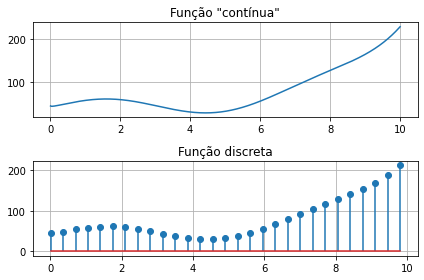

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Função "contínua"
x_cont = np.linspace(0.01, 10, 1000)
y_cont = 20*np.sin(x_cont) + 40 + 1.7**x_cont - np.log(x_cont)

# Função discreta
x_disc = x_cont[::35]
y_disc = y_cont[::35]

# Gráfico da função "contínua"
plt.subplot(2, 1, 1)
plt.plot(x_cont, y_cont)
plt.title('Função "contínua"')
plt.grid(True)

# Gráfico da função "discreta"
plt.subplot(2, 1, 2)
plt.stem(x_disc, y_disc)
plt.title('Função discreta')
plt.grid(True)

plt.tight_layout()
plt.show()

## **A Amostragem Conceitual**

$$x_s(t) = x_c(t) \times s(t) = x_c(t) \underbrace{\sum_{r = -\infty}^{\infty} \delta(t - r \cdot T_a)}_{\text{Trem de Impulsos}} $$

$$x_s(t) = \sum_{r = -\infty}^{\infty} x_c(n T_a) \delta(t - r \cdot T_a)$$

Isso significa dizer que:

$$x_s = x[n] = x_c(nT_a)$$

Pela Propriedade da Convolução, onde $X_c(\omega)$ é o sinal contínuo, mas limitado em banda, e $P(\omega)$ é o trem de impulsos no domínio da frequência.:

$$ \boxed{X_s(\omega) = \frac{1}{2 \pi} X_c(\omega) * P(\omega)} \tag{Conv.}$$

Iremos destrinchar o sinal $s(t)$ no domínio da frequência com a Transformada de Fourier de sinais periódicos.

$$P(\omega) = \mathcal{F} \left[s(\omega) \right] = \mathcal{F} \left[ \sum_{k = -\infty}^{\infty} C_k e^{-ik\omega_s t} \right] =  \sum_{k = -\infty}^{\infty} 2\pi C_k \delta(\omega - k\omega_s) $$

onde $C_k$ são os coeficientes de Fourier para sinais periódicos. Para acharmos os valores dos $C_k$, temos que:

$$C_k = \frac{1}{T_a} \int_{T_a} s(t) e^{-ik \omega_s t}dt = \frac{1}{T_a} \int_{T_a} \delta(t) e^{-ik \omega_s t}dt = \frac{1}{T_a}$$

$$ \boxed{C_k = \frac{1}{T_a}}$$

Com esse resultado em mãos, podemos determinar $P(\omega)$:

$$ P(\omega) = \sum_{k = -\infty}^{\infty} 2\pi C_k \delta(\omega - k\omega_s) = \sum_{k = -\infty}^{\infty} \frac{2\pi}{T_a} \delta(\omega - k\omega_s) = \sum_{k = -\infty}^{\infty} \omega_s \delta(\omega - k\omega_s)$$

$$ \boxed{P(\omega) = \sum_{k = -\infty}^{\infty} \frac{2\pi}{T_a} \delta(\omega - k\omega_s)}$$

Da equação da Conv. acima, podemos determinar $X_s(\omega)$:

$$ \begin{align*} X_s(\omega) &= \frac{1}{2 \pi} X_c(\omega) * P(\omega) \\ \, &= \frac{1}{2 \pi} X_c(\omega) * \sum_{k = -\infty}^{\infty} \frac{2\pi}{T_a} \delta(\omega - k\omega_s) \\ \, &= \frac{1}{T_a} \sum_{k = -\infty}^{\infty} X(\omega - k\omega_s) \end{align*}$$

Finalemente:

$$ \boxed{X_s(\omega) = \frac{1}{T_a} \sum_{k = -\infty}^{\infty} X(\omega - k\omega_s)}$$

Para visualizarmos isso, veja a **figura do sinal contínuo no tempo, mas limitado em Banda**

![](../imagens/Unidade2/sinal_continuo.png)

veja agora a **figura do sinal discreto no tempo e ilimitado na banda**

![](../imagens/Unidade2/sinal_discreto.png)

O espectro do sinal amostrado, $X_s(\omega)$, é formado por uma repetição periódica de $X_c(\omega)$. Note que, da figura acima, podemos achar uma relação para que não haja sobreposição de réplicas espectrais. 

$$\omega_s - 2\pi B ≥ 2\pi B \implies f_s ≥ 2 B$$

$$\boxed{f_s ≥ 2 B}$$

**Muito Importante!** Isso significa que , para que o sinal discreto tenha a capacidade de restaurar o sinal contínuo, o sinal deve ser amostrado em frequências maiores que $2B$.

## **Teorema de Nyquist-Shannon**

Seja $x(t)$ um sinal limitado em banda B Hz, isto é, $|X(\omega)| = 0$ para todo $|\omega| > 2\pi B$, para que seja possível reconstruir $x(t)$ unicamente através de suas amostras, estas devem ter uma taxa de amostragem mais alta que $2B$.

* OBS 1: No limite, a menor frequência de amostragem, $2B$, é chamada de taxa de amostragem de Nyquist.

* OBS 2: Caso uma informação tenha a taxa de amostragem de Nyquist, ela não poderá ser reconstruida na realidade, tendo-se em vista que o filtro perfeito não pode ser aplicado.

## **Amostragem por trem de pulsos de ondas quadradas**

Similarmente ao que vimos anteriormente, podemos utilizar pulsos retangulares para amostrar um sinais. Como impulsos (deltas de Dirac) não podem ser implementados fisicamente, podemos utilizar um sinal de pulso de ondas quadradas para representar os impulsos.

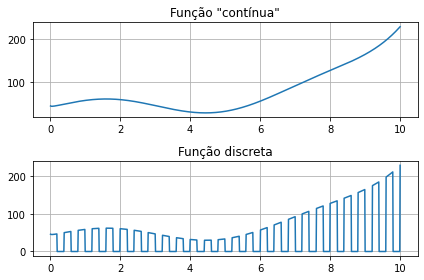

In [46]:
import numpy as np
import scipy.signal as sig

# Função "contínua"
x_cont = np.linspace(0.01, 10, 1000)
y_cont = 20*np.sin(x_cont) + 40 + 1.7**x_cont - np.log(x_cont)

# Função discreta
y_disc = (sig.square(5 * np.pi * x_cont) +1)/2 * y_cont

# Gráfico da função "contínua"
plt.subplot(2, 1, 1)
plt.plot(x_cont, y_cont)
plt.title('Função "contínua"')
plt.grid(True)

# Gráfico da função "discreta"
plt.subplot(2, 1, 2)
plt.plot(x_cont, y_disc)
plt.title('Função discreta')
plt.grid(True)

plt.tight_layout()
plt.show()

## **Amostragem por trem de pulsos de ondas triangulares**

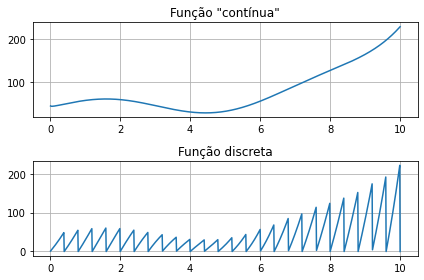

In [45]:
import numpy as np
import scipy.signal as sig

# Função "contínua"
x_cont = np.linspace(0.01, 10, 1000)
y_cont = 20*np.sin(x_cont) + 40 + 1.7**x_cont - np.log(x_cont)

# Função discreta
y_disc = (sig.sawtooth(5 * np.pi * x_cont)+1)/2 * y_cont

# Gráfico da função "contínua"
plt.subplot(2, 1, 1)
plt.plot(x_cont, y_cont)
plt.title('Função "contínua"')
plt.grid(True)

# Gráfico da função "discreta"
plt.subplot(2, 1, 2)
plt.plot(x_cont, y_disc)
plt.title('Função discreta')
plt.grid(True)

plt.tight_layout()
plt.show()

# **Aliasing**